In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

# Thompson Sampling

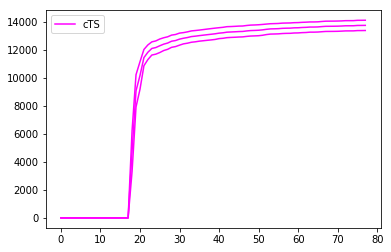

In [40]:
RMITD_Thompson_Sampling = {"noise_lvl":[],"mean":[], "MSE":[]}
noise = 6.24
color="magenta"
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/RMITD_TS/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        vals = data["Opportunity_cost"].values[:i+1]
       
        cum_val.append(np.max(vals))

    results_1.append(np.array(cum_val).reshape(-1))


mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))

confidence = mean_values_mistery_bnch[-1] + 1.5*MSE_mistery_bnch[-1]
filered_results = []

for i in range(len(results_1)):
    if results_1[i][-1] < confidence:
        filered_results.append(results_1[i])  



mean_values_mistery_bnch = np.mean(filered_results,axis=0)
std_values = np.std(filered_results,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results))

RMITD_Thompson_Sampling["noise_lvl"].append(noise)
RMITD_Thompson_Sampling["mean"].append(mean_values_mistery_bnch)
RMITD_Thompson_Sampling["MSE"].append(MSE_mistery_bnch)

plt.plot(mean_values_mistery_bnch, color=color,label="cTS")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color)

#plt.yscale("log")
plt.legend()
plt.show()

# Expected Improvement

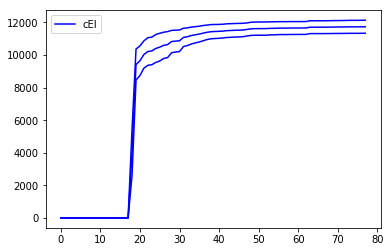

In [41]:
RMITD_Expected_Improvement = {"noise_lvl":[],"mean":[], "MSE":[]}
noise = 6.24
color="blue"
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/RMITD_EI/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        vals = data["Opportunity_cost"].values[:i+1]
       
        cum_val.append(np.max(vals))

    results_1.append(np.array(cum_val).reshape(-1))


mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))

confidence = mean_values_mistery_bnch[-1] + 1.5*MSE_mistery_bnch[-1]
filered_results = []

for i in range(len(results_1)):
    if results_1[i][-1] < confidence:
        filered_results.append(results_1[i])  



mean_values_mistery_bnch = np.mean(filered_results,axis=0)
std_values = np.std(filered_results,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results))

RMITD_Expected_Improvement["noise_lvl"].append(noise)
RMITD_Expected_Improvement["mean"].append(mean_values_mistery_bnch)
RMITD_Expected_Improvement["MSE"].append(MSE_mistery_bnch)

plt.plot(mean_values_mistery_bnch, color=color,label="cEI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color)

#plt.yscale("log")
plt.legend()
plt.show()

# COMPARISON

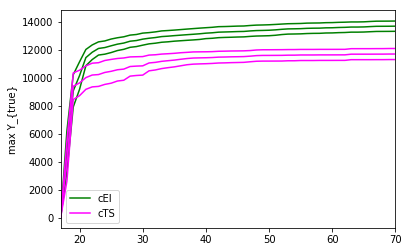

In [45]:
# plt.plot(mean_values_mistery, color="blue",label="cKG")
# plt.plot(mean_values_mistery+MSE_mistery, color="blue")
# plt.plot(mean_values_mistery-MSE_mistery, color="blue")


plt.plot(RMITD_Thompson_Sampling["mean"][0], color="green",label="cEI")
plt.plot(RMITD_Thompson_Sampling["mean"][0] + RMITD_Thompson_Sampling["MSE"][0], color="green")
plt.plot(RMITD_Thompson_Sampling["mean"][0] - RMITD_Thompson_Sampling["MSE"][0], color="green")


plt.plot(RMITD_Expected_Improvement["mean"][0], color="magenta",label="cTS")
plt.plot(RMITD_Expected_Improvement["mean"][0]+RMITD_Expected_Improvement["MSE"][0], color="magenta")
plt.plot(RMITD_Expected_Improvement["mean"][0]-RMITD_Expected_Improvement["MSE"][0], color="magenta")

plt.legend()
plt.xlim(17,70)
plt.ylabel("max Y_{true}")
plt.show()